# house price prediction

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [2]:
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (2).csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_id = train.drop("Id", axis =1,inplace =True)
test_id = test.drop("Id", axis =1,inplace =True)

### outliers treatment

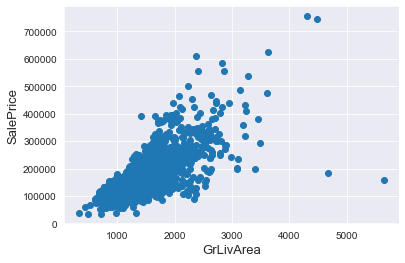

In [7]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.show()

In [8]:
#drop the outliers
train[train.GrLivArea>4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,60,RL,104.000,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.000,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [9]:
train[(train.GrLivArea>4000) & (train.SalePrice<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [10]:
train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index

Int64Index([523, 1298], dtype='int64')

In [11]:
train.drop(index = train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index, inplace =True)

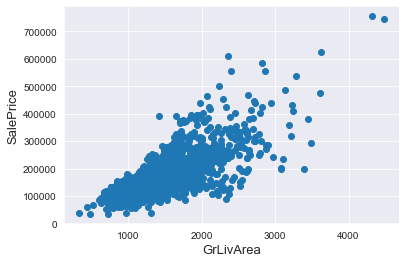

In [12]:
#also cabn written
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


### checking sales prices distribution and transforming it to normal

In [13]:
train['SalePrice'] <0.3

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1458, dtype: bool

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

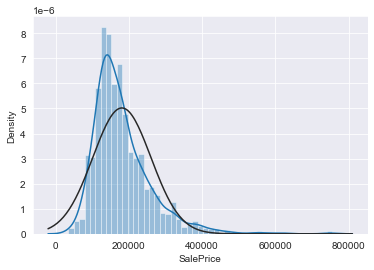

In [14]:
sns.distplot(train['SalePrice'] , fit=norm)

In [15]:
train.SalePrice.agg(['skew', 'kurtosis']).transpose()

skew       1.881
kurtosis   6.523
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

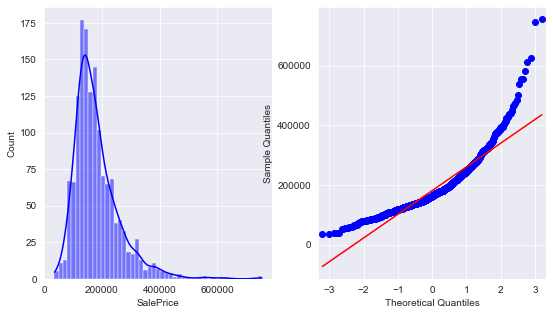

In [16]:


fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sm.ProbPlot(train.SalePrice).qqplot(line='s', ax=ax[1]);
sns.histplot(train.SalePrice,kde=True, color ='blue',ax=ax[0])

In [17]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
 
train["SalePrice"]=np.log1p(train["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

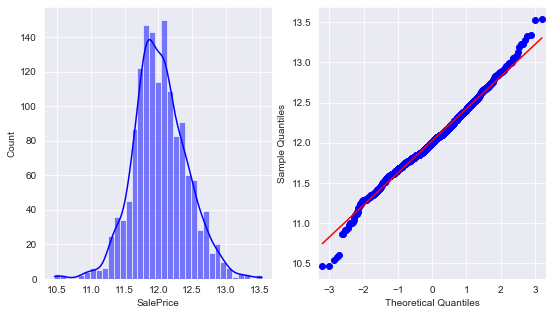

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sm.ProbPlot(train["SalePrice"]).qqplot(line='s', ax=ax[1]);
sns.histplot(train["SalePrice"],kde=True, color ='blue',ax=ax[0])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

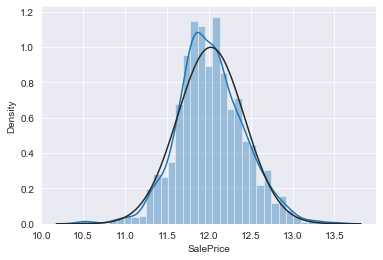

In [19]:
sns.distplot(train.SalePrice, fit= norm)

In [20]:
train.SalePrice.agg(['skew', 'kurtosis']).transpose()

skew       0.122
kurtosis   0.805
Name: SalePrice, dtype: float64

### missing values treatment

In [21]:
#missing valures 

y_train = train.SalePrice.values
y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [22]:
#concat all data

all_data = pd.concat([train,test], ignore_index=True)

In [23]:
all_data.drop('SalePrice',axis =1,inplace=True)

In [24]:
all_data.shape

(2917, 79)

In [25]:
#percentage missing data
missing_data = (all_data.isna().sum()/all_data.shape[0])*100

In [26]:
missng_per = pd.DataFrame(missing_data.sort_values(ascending=False), columns = ["missing values"])

In [27]:
missng_per.head(30)

,missing values
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageYrBlt,5.451
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451


In [28]:
missing_data

MSSubClass       0.000
MSZoning         0.137
LotFrontage     16.661
LotArea          0.000
Street           0.000
                 ...  
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SaleType         0.034
SaleCondition    0.000
Length: 79, dtype: float64

In [29]:
#top 30 features having respective percentage missing values

values = missing_data.sort_values(ascending=False)[:30]
values

PoolQC         99.691
MiscFeature    96.400
Alley          93.212
Fence          80.425
FireplaceQu    48.680
LotFrontage    16.661
GarageYrBlt     5.451
GarageFinish    5.451
GarageQual      5.451
GarageCond      5.451
GarageType      5.382
BsmtExposure    2.811
BsmtCond        2.811
BsmtQual        2.777
BsmtFinType2    2.743
BsmtFinType1    2.708
MasVnrType      0.823
MasVnrArea      0.788
MSZoning        0.137
Functional      0.069
BsmtHalfBath    0.069
BsmtFullBath    0.069
Utilities       0.069
SaleType        0.034
BsmtFinSF1      0.034
KitchenQual     0.034
GarageCars      0.034
BsmtUnfSF       0.034
TotalBsmtSF     0.034
Exterior2nd     0.034
dtype: float64

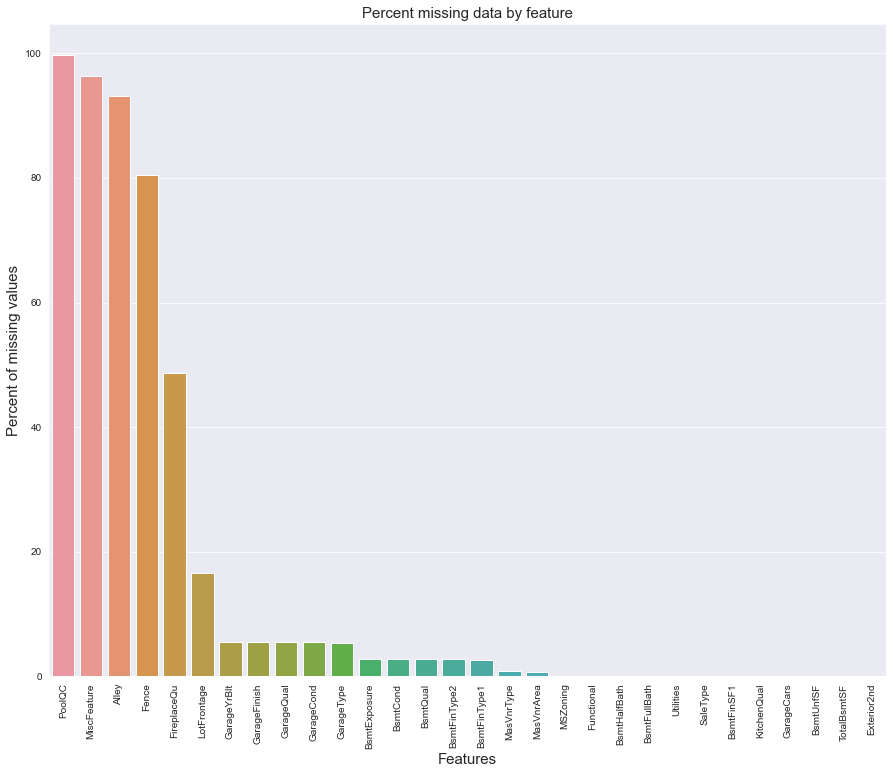

In [30]:
plt.figure(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(values.index,values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [31]:
values[:20]

PoolQC         99.691
MiscFeature    96.400
Alley          93.212
Fence          80.425
FireplaceQu    48.680
LotFrontage    16.661
GarageYrBlt     5.451
GarageFinish    5.451
GarageQual      5.451
GarageCond      5.451
GarageType      5.382
BsmtExposure    2.811
BsmtCond        2.811
BsmtQual        2.777
BsmtFinType2    2.743
BsmtFinType1    2.708
MasVnrType      0.823
MasVnrArea      0.788
MSZoning        0.137
Functional      0.069
dtype: float64

We impute them by proceeding sequentially through features with missing values

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [32]:
all_data.PoolQC.value_counts()      

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64

In [33]:
all_data.PoolQC = all_data.PoolQC.fillna("none")

MiscFeature : data description says NA means "no misc feature"

In [34]:
all_data.MiscFeature.value_counts()   

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [35]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Alley : data description says NA means "no alley access"

In [36]:
all_data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [37]:
all_data["Alley"] = all_data["Alley"].fillna("None")

FireplaceQu : data description says NA means "no fireplace"

In [38]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [39]:
all_data.LotFrontage.value_counts()

60.000     276
80.000     137
70.000     133
50.000     117
75.000     105
          ... 
138.000      1
182.000      1
168.000      1
313.000      1
133.000      1
Name: LotFrontage, Length: 128, dtype: int64

In [40]:
#LotFrontage: Linear feet of street connected to property
#Neighborhood: Physical locations within Ames city limits

In [41]:
all_data.Neighborhood

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
2912    MeadowV
2913    MeadowV
2914    Mitchel
2915    Mitchel
2916    Mitchel
Name: Neighborhood, Length: 2917, dtype: object

In [42]:
all_data.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn   43.000
Blueste   24.000
BrDale    21.000
BrkSide   51.000
ClearCr   80.500
CollgCr   70.000
Crawfor   70.000
Edwards   64.500
Gilbert   64.000
IDOTRR    60.000
MeadowV   21.000
Mitchel   74.000
NAmes     73.000
NPkVill   24.000
NWAmes    80.000
NoRidge   89.000
NridgHt   92.000
OldTown   60.000
SWISU     60.000
Sawyer    72.000
SawyerW   67.000
Somerst   72.500
StoneBr   60.000
Timber    82.000
Veenker   80.000
Name: LotFrontage, dtype: float64

In [43]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [44]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [45]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [46]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [47]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [48]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [49]:
all_data.MSZoning.value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [50]:
all_data.MSZoning.mode().values[0]

'RL'

In [51]:
all_data.MSZoning = all_data.MSZoning.fillna(all_data.MSZoning.mode().values[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [52]:
all_data.Utilities.value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [53]:
all_data.drop('Utilities', axis =1, inplace = True)

Functional : data description says NA means typical

In [54]:
all_data.Functional.value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [55]:
all_data.Functional = all_data.Functional.fillna('Typ')

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [56]:
all_data.Electrical.value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [57]:
all_data.Electrical = all_data.Electrical.fillna(all_data.Electrical.mode().values[0])

In [58]:
all_data.Electrical.mode().values[0]

'SBrkr'

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.


In [59]:
all_data.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [60]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

SaleType : Fill in again with most frequent which is "WD"
        
MSSubClass : Na most likely means No building class. We can replace missing values with None

In [61]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [62]:
all_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 78, dtype: int64

Fence : data description says NA means "no fence"

In [63]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [64]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [65]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,none,None,None,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,none,None,None,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,none,None,None,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,none,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,none,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.000,1936,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,none,None,None,0,6,2006,WD,Normal
2913,160,RM,21.000,1894,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,none,None,None,0,4,2006,WD,Abnorml
2914,20,RL,160.000,20000,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,none,None,None,0,9,2006,WD,Abnorml
2915,85,RL,62.000,10441,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,none,MnPrv,Shed,700,7,2006,WD,Normal


### Transforming some numerical variables that are really categorical

In [66]:
all_data.Fence.value_counts()

None     2346
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [67]:
all_data.MoSold.value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    172
9     158
11    142
2     133
1     121
12    104
Name: MoSold, dtype: int64

In [68]:
all_data['MSSubClass'].value_counts()

20     1079
60      573
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [69]:
all_data['OverallCond'].value_counts()

5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [70]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [71]:
all_data.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2912    2006
2913    2006
2914    2006
2915    2006
2916    2006
Name: YrSold, Length: 2917, dtype: object

In [72]:
all_data.FireplaceQu.value_counts()

None    1420
Gd       742
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

###### Label Encoding some categorical variables that may contain information in their ordering set

In [73]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))




Shape all_data: (2917, 78)


#### adding new derived feature
Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [74]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


#### correcting Skewed features transformation 

In [75]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewness = all_data[numeric_feats].agg(['skew']).transpose().sort_values('skew',ascending=False)
skewness.head(10)

,skew
MiscVal,21.951
PoolArea,17.698
LotArea,13.116
LowQualFinSF,12.091
3SsnPorch,11.378
LandSlope,4.976
KitchenAbvGr,4.303
BsmtFinSF2,4.147
EnclosedPorch,4.004
ScreenPorch,3.947


Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+𝑥.

Note that setting 𝜆=0 is equivalent to log1p used above for the target variable.

In [76]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:

    all_data[feat] = boxcox1p(all_data[feat], lam)
    


There are 59 skewed numerical features to Box Cox transform


In [77]:
all_data.Street.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2912    False
2913    False
2914    False
2915    False
2916    False
Name: Street, Length: 2917, dtype: bool

In [79]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,2.886,RL,5.831,19.212,0.730,0.730,1.541,Lvl,Inside,0.000,...,0.000,1.541,1.820,None,0.000,1.820,1.194,WD,Normal,14.977
1,2.056,RL,6.221,19.712,0.730,0.730,1.541,Lvl,FR2,0.000,...,0.000,1.541,1.820,None,0.000,2.440,0.730,WD,Normal,14.923
2,2.886,RL,5.915,20.347,0.730,0.730,0.000,Lvl,Inside,0.000,...,0.000,1.541,1.820,None,0.000,3.011,1.194,WD,Normal,15.150
3,3.011,RL,5.685,19.692,0.730,0.730,0.000,Lvl,Corner,0.000,...,0.000,1.541,1.820,None,0.000,1.820,0.000,WD,Abnorml,14.857
4,2.886,RL,6.315,21.325,0.730,0.730,0.000,Lvl,FR2,0.000,...,0.000,1.541,1.820,None,0.000,1.541,1.194,WD,Normal,15.852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.194,RM,3.933,14.081,0.730,0.730,1.541,Lvl,Inside,0.000,...,0.000,1.541,1.820,None,0.000,2.603,0.000,WD,Normal,13.568
2913,1.194,RM,3.933,14.013,0.730,0.730,1.541,Lvl,Inside,0.000,...,0.000,1.541,1.820,None,0.000,2.260,0.000,WD,Abnorml,13.568
2914,2.056,RL,7.620,22.782,0.730,0.730,1.541,Lvl,Inside,0.000,...,0.000,1.541,1.820,None,0.000,3.011,0.000,WD,Abnorml,14.824
2915,3.341,RL,5.744,20.047,0.730,0.730,1.541,Lvl,Inside,0.000,...,0.000,1.541,1.194,Shed,11.148,2.750,0.000,WD,Normal,13.994


#### encoding for left categorical features

In [80]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


#### correlation of input features with SalesPrice in train dataset

In [84]:
high_corr_feat = train.corr()['SalePrice'].sort_values(ascending=False)[:13]
high_corr_feat

SalePrice      1.000
OverallQual    0.821
GrLivArea      0.725
GarageCars     0.681
GarageArea     0.656
TotalBsmtSF    0.648
1stFlrSF       0.621
FullBath       0.596
YearBuilt      0.587
YearRemodAdd   0.566
GarageYrBlt    0.542
TotRmsAbvGrd   0.538
Fireplaces     0.492
Name: SalePrice, dtype: float64

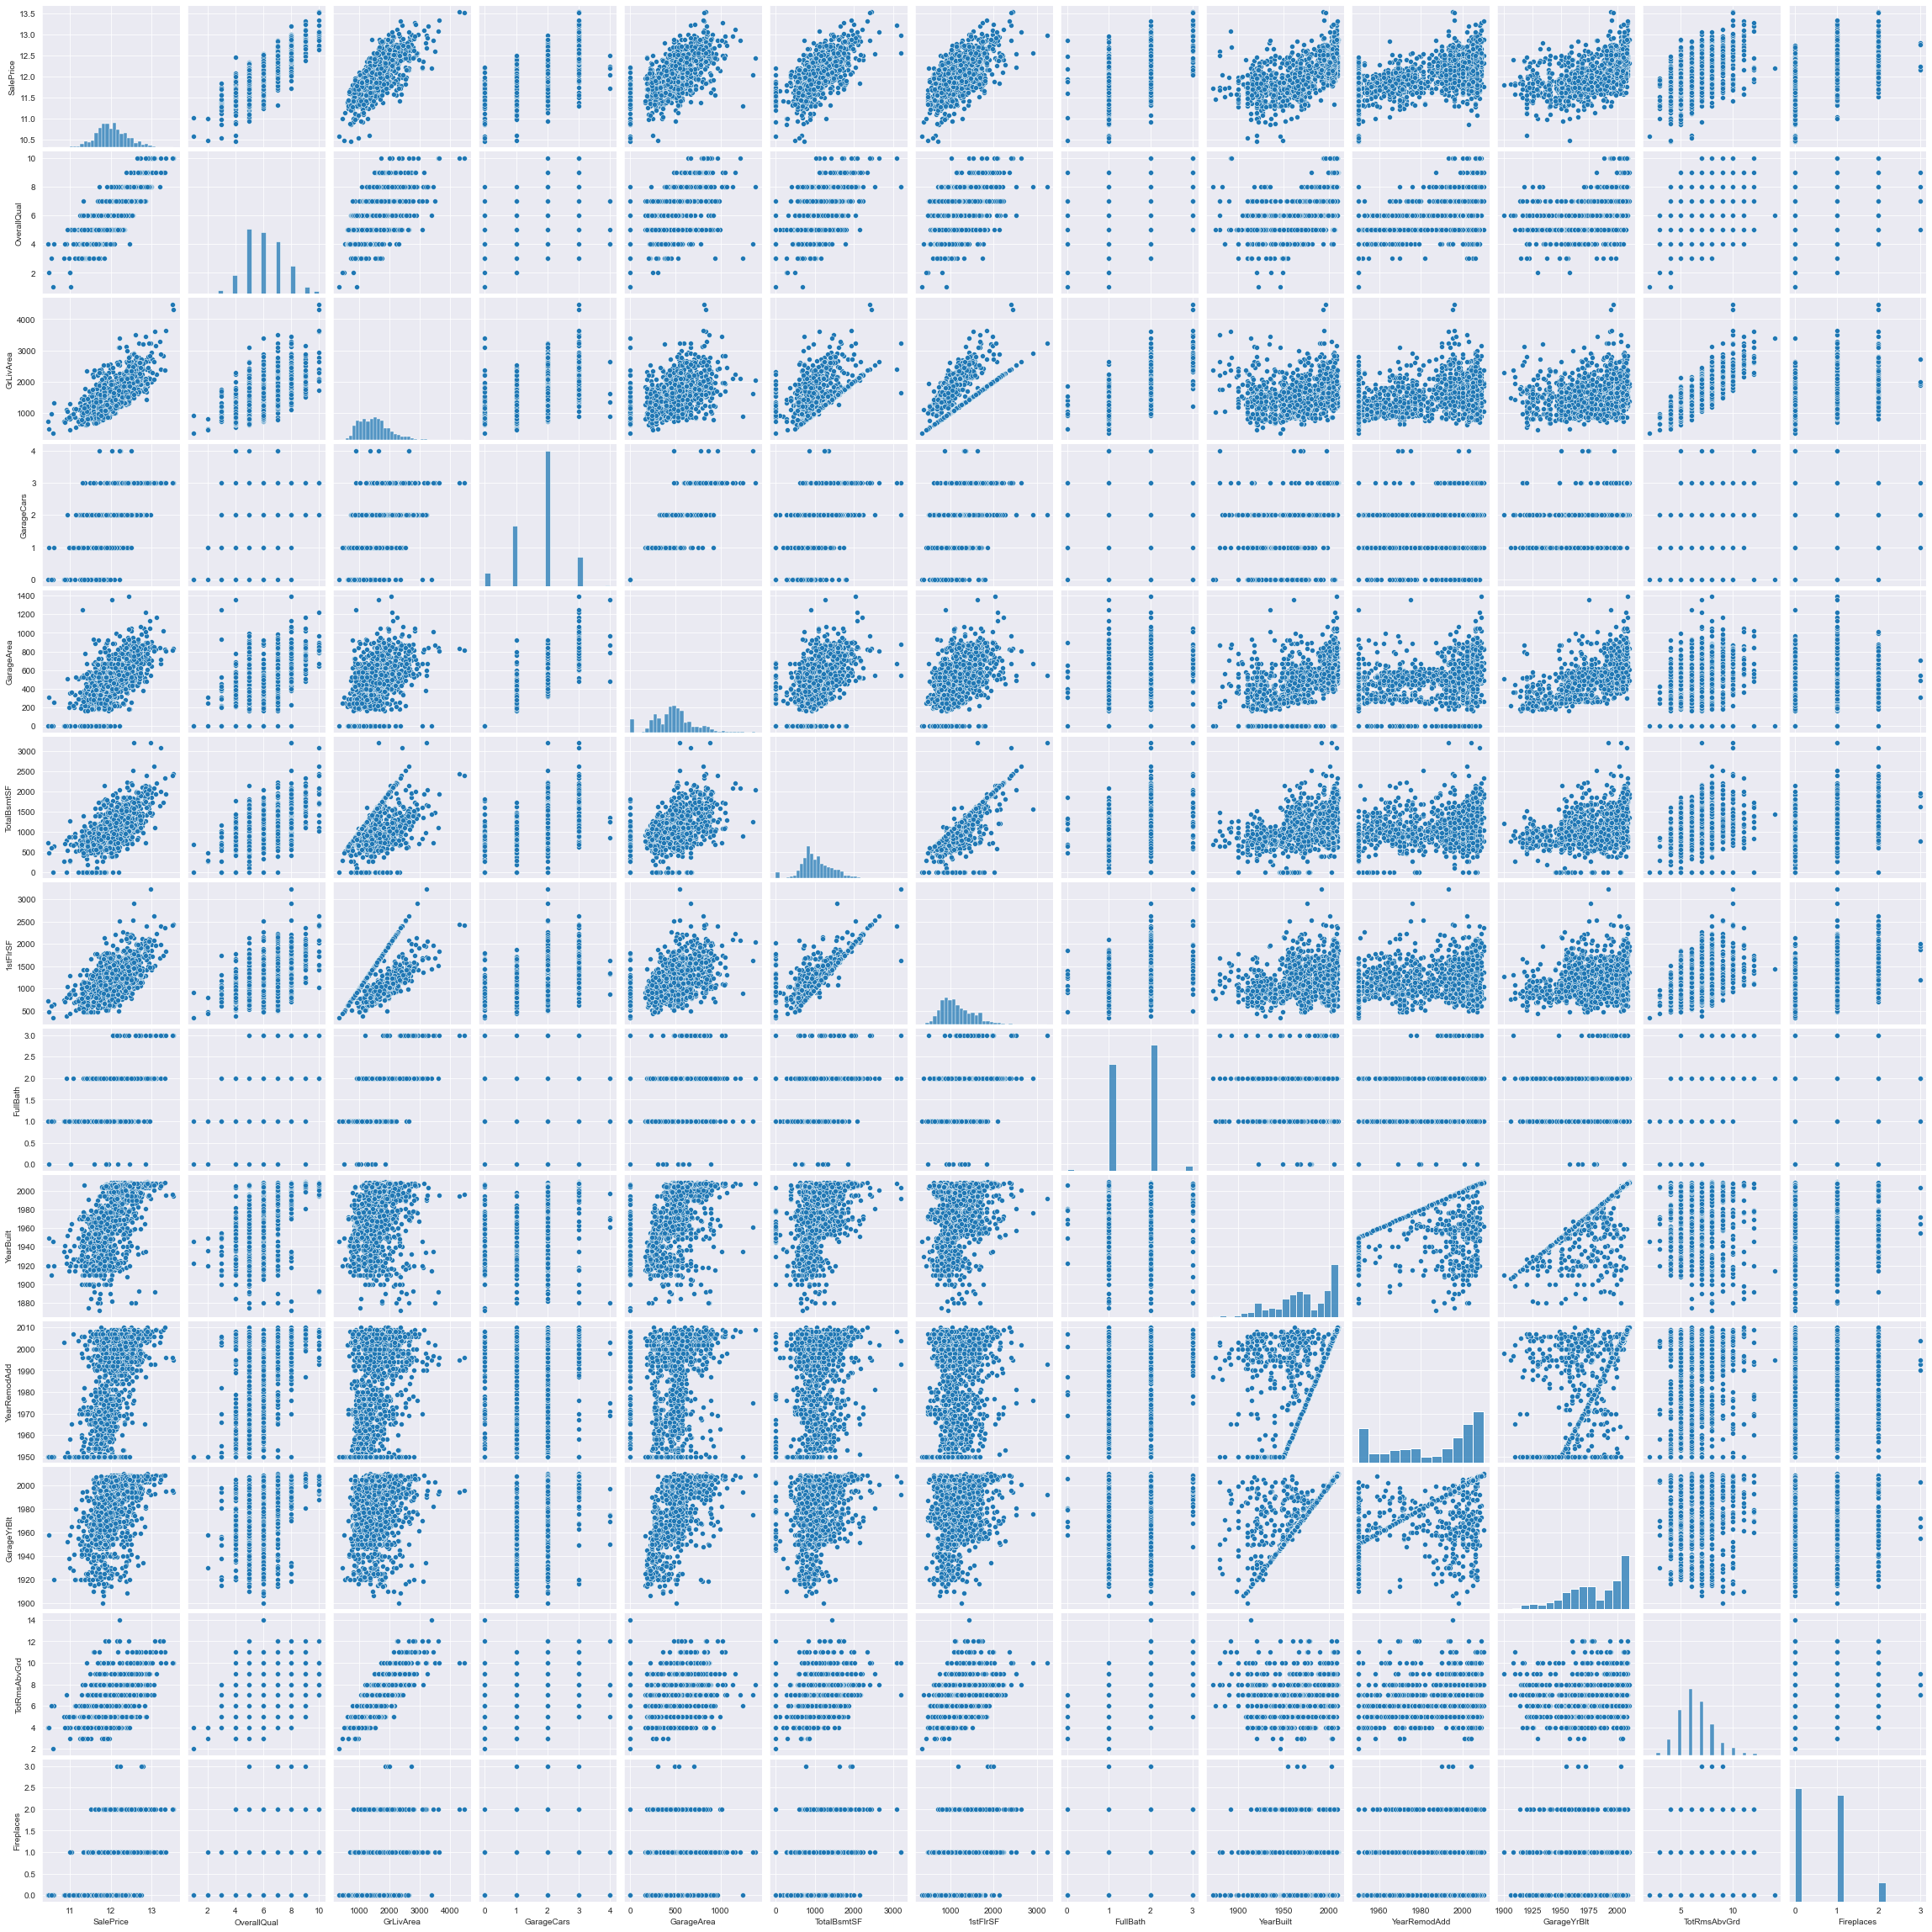

In [154]:
sns.pairplot(train[high_corr_feat.index])

In [108]:
ntrain = train.shape[0]
ntest = test.shape[0]
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]


In [116]:
#saving dataset


train.to_csv("train of transformed data.csv", index = None)
test.to_csv("test of transformed data.csv",index = None)


# model buldinig

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [41]:
test = pd.read_csv('train of transformed data.csv')
train = pd.read_csv('test of transformed data.csv')


In [3]:
test_ID = train_id
test_ID = test_id

0       1458
1       1459
2       1460
3       1461
4       1462
        ... 
1454    2912
1455    2913
1456    2914
1457    2915
1458    2916
Name: Unnamed: 0, Length: 1459, dtype: int64

In [4]:
y_train = y1_train['0']

In [5]:
train.shape

(1458, 220)

In [6]:
test.shape

(1459, 221)

In [7]:
y1_train.drop('Unnamed: 0', axis =1, inplace =True)

In [8]:
y_train.shape

(1458,)

In [9]:
y_train = y1_train.values


In [10]:
#modeling

In [11]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
train.shape

(1458, 220)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import time
import xgboost
from sklearn.model_selection import cross_val_score

#import warnings
#warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import time
import xgboost
from sklearn.model_selection import cross_val_score

#import warnings
#warnings.filterwarnings('ignore')


def train_model(model, X,y):
    start = time.time()
    model.fit(X,y)
    training_execution_time = time.time() - start
    
    start = time.time()
    y_prd = model.predict(X)
    prediction_execution_time = time.time()-start
    
    rms_error = np.sqrt(mean_squared_error(y,y_prd))
    
    model_and_predictions_dictionary = {'Regression': str(model),
                                        'rms Error': np.round(rms_error, 2),                          
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }
    
    performances = pd.DataFrame([[str(model), np.round(rms_error, 2),training_execution_time,prediction_execution_time]], 
                           columns=['Regression','rms Error','training_execution_time','prediction_execution_time'])
    return model_and_predictions_dictionary, performances
    



def train_modelCV(model, X,y):
    start = time.time()
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=4)
    rmse_scores = np.sqrt(-scores)
    
    CV_execution_time = time.time()-start
    
    
    
    model_and_predictions_dictionary = {'RegressionCV': str(model),
                                        'mean rms Error': np.round(rmse_scores.mean(), 2),
                                        "Standard deviation":np.round(rmse_scores.std(), 2),
                                        'CV_execution_time': CV_execution_time,
                                        
                                       }
    
    performances = pd.DataFrame([[str(model), np.round(rmse_scores.mean(), 2),np.round(rmse_scores.std(), 2),CV_execution_time]], 
                           columns=['RegressionCV','mean rms Error','Standard deviation','CV_execution_time'])
    return model_and_predictions_dictionary, performances
    


    

    

In [14]:
lr = make_pipeline(StandardScaler(), LinearRegression())                  
lasso = make_pipeline(StandardScaler(), Lasso(random_state=42))
ridg = make_pipeline(StandardScaler() , Ridge(random_state=42))
ENet = make_pipeline(StandardScaler(), ElasticNet(random_state=42))
GBoost = GradientBoostingRegressor(random_state=42)
model_xgb = xgb.XGBRegressor(random_state=42)

In [15]:
regression_dictionary={ 'lr':lr,
                        'lass':lasso, 
                        'Ridg': ridg,
                        'elst':ENet, 
                        'grd':GBoost,
                        'XGb':model_xgb
                       }


dataframe = pd.DataFrame()
for regression_name in regression_dictionary:
    model_and_predictions_dictionary,performances  = train_model(regression_dictionary[regression_name], train.values,y_train)
    dataframe = dataframe.append(performances)
dataframe['Regression'] = ["LinearRegression",'lasso','Ridg','ElasticNet','grdboost','XGboost']

In [16]:
dataframe.sort_values('rms Error')

,Regression,rms Error,training_execution_time,prediction_execution_time
0,XGboost,0.010,1.336,0.018
0,grdboost,0.080,1.577,0.009
0,Ridg,0.090,0.039,0.007
0,LinearRegression,0.100,0.106,0.008
0,lasso,0.400,0.032,0.009
0,ElasticNet,0.400,0.029,0.007


# Performances using cross validation

In [17]:
regression_dictionary={ 'lr':lr,
                        'lass':lasso, 
                        'Ridg': ridg,
                        'elst':ENet, 
                        'grd':GBoost,
                        'XGb':model_xgb
                       }


dataframeCV = pd.DataFrame()
for regression_name in regression_dictionary:
    model_and_predictions_dictionary,performances  = train_modelCV(regression_dictionary[regression_name], train.values,y_train)
    dataframeCV = dataframeCV.append(performances)
dataframeCV['RegressionCV'] = ["LinearRegression",'lasso','Ridg','ElasticNet','grdboost','XGboost']

In [18]:
dataframeCV.sort_values('mean rms Error')

,RegressionCV,mean rms Error,Standard deviation,CV_execution_time
0,Ridg,0.120,0.010,0.150
0,grdboost,0.120,0.010,5.227
0,XGboost,0.130,0.010,3.935
0,lasso,0.400,0.020,0.095
0,ElasticNet,0.400,0.020,0.139
0,LinearRegression,365433665228.090,180303300249.710,0.264


# Comparision bw performances

In [19]:
dataframe

,Regression,rms Error,training_execution_time,prediction_execution_time
0,LinearRegression,0.100,0.106,0.008
0,lasso,0.400,0.032,0.009
0,Ridg,0.090,0.039,0.007
0,ElasticNet,0.400,0.029,0.007
0,grdboost,0.080,1.577,0.009
0,XGboost,0.010,1.336,0.018


In [20]:
dataframeCV

,RegressionCV,mean rms Error,Standard deviation,CV_execution_time
0,LinearRegression,365433665228.090,180303300249.710,0.264
0,lasso,0.400,0.020,0.095
0,Ridg,0.120,0.010,0.150
0,ElasticNet,0.400,0.020,0.139
0,grdboost,0.120,0.010,5.227
0,XGboost,0.130,0.010,3.935


# After manupulating parameters of models

In [21]:
lr = make_pipeline(StandardScaler(), LinearRegression())
lasso = make_pipeline(StandardScaler(), Lasso(alpha =0.0005, random_state=1))
ridg = make_pipeline(StandardScaler() , Ridge(random_state=42))
ENet = make_pipeline(StandardScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, 
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [22]:
regression_dictionary={ 'lr':lr,
                        'lass':lasso, 
                        'Ridg': ridg,
                        'elst':ENet, 
                        'grd':GBoost,
                        'XGb':model_xgb
                       }




dataframeCV2 = pd.DataFrame()
for regression_name in regression_dictionary:
    model_and_predictions_dictionary,performances  = train_modelCV(regression_dictionary[regression_name], train.values,y_train)
    dataframeCV2 = dataframeCV2.append(performances)
dataframeCV2['RegressionCV'] = ["LinearRegression",'lasso','Ridg','ElasticNet','grdboost','XGboost']

[19:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

In [24]:
dataframeCV2.sort_values('mean rms Error')

,RegressionCV,mean rms Error,Standard deviation,CV_execution_time
0,lasso,0.120,0.010,0.482
0,Ridg,0.120,0.010,0.108
0,ElasticNet,0.120,0.010,0.657
0,grdboost,0.120,0.010,273.140
0,XGboost,0.120,0.010,44.250
0,LinearRegression,365433665228.090,180303300249.710,0.368


# stacking

In [25]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [26]:
averaged_models = AveragingModels(models = (ENet,lasso,ridg,GBoost))

In [27]:
regression_dictionary={'averaged_models':averaged_models }
                        

dataframe = pd.DataFrame()
for regression_name in regression_dictionary:
    model_and_predictions_dictionary,performances  = train_modelCV(regression_dictionary[regression_name], train.values,y_train)
    dataframe = dataframe.append(performances)

In [28]:
dataframe

,RegressionCV,mean rms Error,Standard deviation,CV_execution_time
0,AveragingModels(models=(Pipeline(steps=[('stan...,0.110,0.010,282.400


# final train and prediction

In [29]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [32]:
y_train

array([[12.24769912],
       [12.10901644],
       [12.31717117],
       ...,
       [12.49313327],
       [11.86446927],
       [11.90159023]])

In [35]:
averaged_models.fit(train, y_train)
AveragingModels_train_pred = averaged_models.predict(train.values)
avg_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y_train, AveragingModels_train_pred))

0.07822449161211849


In [36]:
avg_pred

array([122278.90187758, 162631.19765191, 186120.60009959, ...,
       170306.72386263, 118696.48185017, 223311.99026103])

In [37]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = avg_pred
sub.to_csv('submission.csv',index=False)